# Visualizing categorical data
  
In the :ref:`relational plot tutorial <relational_tutorial>` we saw how to use different visual representations to show the relationship between multiple variables in a dataset. In the examples, we focused on cases where the main relationship was between two numerical variables. If one of the main variables is "categorical" (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between :func:`relplot` and either :func:`scatterplot` or :func:`lineplot`, there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, :func:`catplot`, that gives unified higher-level access to them.

It's helpful to think of the different categorical plot kinds as belonging to three different families, which we'll discuss in detail below. They are:

Categorical scatterplots:

- :func:`stripplot` (with ``kind="strip"``; the default)
- :func:`swarmplot` (with ``kind="swarm"``)

Categorical distribution plots:

- :func:`boxplot` (with ``kind="box"``)
- :func:`violinplot` (with ``kind="violin"``)
- :func:`boxenplot` (with ``kind="boxen"``)

Categorical estimate plots:

- :func:`pointplot` (with ``kind="point"``)
- :func:`barplot` (with ``kind="bar"``)
- :func:`countplot` (with ``kind="count"``)

These families represent the data using different levels of granularity. When deciding which to use, you'll have to think about the question that you want to answer. The unified API makes it easy to switch between different kinds and see your data from several perspectives.

In this tutorial, we'll mostly focus on the figure-level interface, :func:`catplot`. Remember that this function is a higher-level interface each of the functions above, so we'll reference them when we show each kind of plot, keeping the more verbose kind-specific API documentation at hand.

In [1]:
!pip install -q -r requirements.txt

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

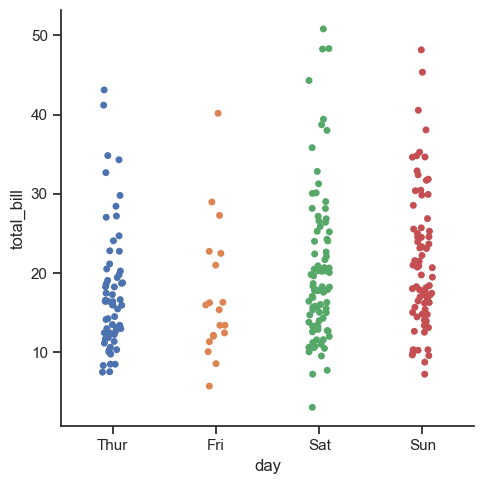

In [3]:
tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

In [4]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

In [5]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

In [6]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

In [7]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill")

In [8]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"])

In [9]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

In [10]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

In [11]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

In [12]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(
    data=tips, x="day", y="total_bill", hue="weekend",
    kind="box", dodge=False,
)

In [13]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

In [14]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

In [15]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw=.15, cut=0,
)

In [16]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

In [17]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)

In [18]:
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

<AxesSubplot: xlabel='day', ylabel='total_bill'>

In [19]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

In [20]:
sns.catplot(data=titanic, x="deck", kind="count", palette="ch:.25")

In [21]:
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

In [22]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

In [23]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

In [24]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
)

C:\Users\schatzm\Anaconda3\envs\julab\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


In [25]:
from matplotlib.ticker import FuncFormatter
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")

def forms(x, pos):
    'The two args are the value and tick position'
    return '$%.0f' % (x)

formatter = FuncFormatter(forms)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(formatter) #'${x:.0f}'

In [26]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,matplotlib,bokeh,altair,plotly"))

Last updated: 2023-01-05T13:19:28.017137+01:00

Python implementation: CPython
Python version       : 3.9.15
IPython version      : 8.8.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 85 Stepping 7, GenuineIntel
CPU cores   : 40
Architecture: 64bit

watermark : 2.3.1
numpy     : 1.24.1
pandas    : 1.5.2
matplotlib: 3.6.2
bokeh     : 3.0.3
altair    : 4.2.0
plotly    : 5.11.0

